In [ ]:
!pip install kagglehub



In [ ]:
import kagglehub
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = kagglehub.dataset_download("amaanpoonawala/youtube-comments-sentiment-dataset")

print("Path to dataset files:", path)

100%|██████████| 150M/150M [00:06<00:00, 25.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/amaanpoonawala/youtube-comments-sentiment-dataset/versions/1


In [ ]:
import pandas as pd

link = (
    "/root/.cache/kagglehub/datasets"
"/amaanpoonawala/youtube-comments-sentiment"
"-dataset/versions/1/youtube_comments_cleaned.csv"
)
data = pd.read_csv(link)
data.head()

,CommentID,VideoID,VideoTitle,AuthorName,AuthorChannelID,CommentText,Sentiment,Likes,Replies,PublishedAt,CountryCode,CategoryID
0,UgyRjrEdJIPrf68uND14AaABAg,mcY4M9gjtsI,They killed my friend.#tales #movie #shorts,@OneWhoWandered,UC_-UEXaBL1dqqUPGkDll49A,Anyone know what movie this is?,Neutral,0,2,2025-01-15 00:54:55,NZ,1
1,UgxXxEIySAwnMNw8D7N4AaABAg,2vuXcw9SZbA,Man Utd conceding first penalty at home in yea...,@chiefvon3068,UCZ1LcZESjYqzaQRhjdZJFwg,The fact they're holding each other back while...,Positive,0,0,2025-01-13 23:51:46,AU,17
2,UgxB0jh2Ur41mcXr5IB4AaABAg,papg2tsoFzg,Welcome to Javascript Course,@Abdulla-ip8qr,UCWBK35w5Swy1iF5xIbEyw3A,waiting next video will be?,Neutral,1,0,2020-07-06 13:18:16,IN,27
3,UgwMOh95MfK0GuXLLrF4AaABAg,31KTdfRH6nY,Building web applications in Java with Spring ...,@finnianthehuman,UCwQ2Z03nOcMxWozBb_Cv66w,Thanks for the great video.\n\nI don't underst...,Neutral,0,1,2024-09-18 12:04:12,US,27
4,UgxJuUe5ysG8OSbABAl4AaABAg,-hV6aeyPHPA,After a new engine her car dies on her way hom...,@ryoutubeplaylistb6137,UCTTcJ0tsAKQokmHB2qVb1qQ,Good person helping good people.\nThis is how ...,Positive,3,1,2025-01-10 19:39:03,US,2


In [ ]:
new_data = data[['CommentText', 'Sentiment']]
new_data.Sentiment.value_counts()

,count
Sentiment,
Negative,346075
Positive,343317
Neutral,342833


<BarContainer object of 3 artists>

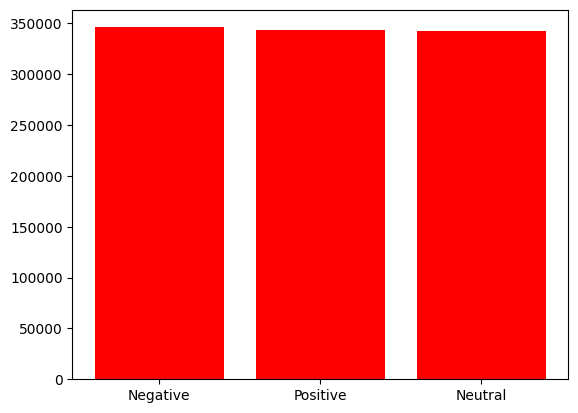

In [ ]:
plt.bar(new_data["Sentiment"].value_counts().index, new_data["Sentiment"].value_counts().values, color = 'red')

In [ ]:
import string
import re
from nltk.corpus import stopwords
import nltk

In [ ]:
def clean_text(text):
  if isinstance(text, str):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\S+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace('\n', ' ')
    text = re.sub(r'\s+', ' ', text).strip()

  else:
    text = ''
  return text

new_data['cleaned_comment'] = new_data['CommentText'].apply(clean_text)
print(new_data[['CommentText', 'cleaned_comment']].head())

                                         CommentText  \
0                    Anyone know what movie this is?   
1  The fact they're holding each other back while...   
2                        waiting next video will be?   
3  Thanks for the great video.\n\nI don't underst...   
4  Good person helping good people.\nThis is how ...   

                                     cleaned_comment  
0                     anyone know what movie this is  
1  the fact theyre holding each other back while ...  
2                         waiting next video will be  
3  thanks for the great video i dont understand w...  
4  good person helping good people this is how it...  


<ipython-input-30-8fcd72224ccd>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cleaned_comment'] = new_data['CommentText'].apply(clean_text)


In [ ]:
label_map = {'Negative' : 0, 'Positive' : 1, 'Neutral' : 2}
rev_map = {1 : 'Positive', 0 : 'Negative', 2 : 'Neutral'}
new_data['Sentiment'] = new_data['Sentiment'].map(label_map)
new_data.head()

<ipython-input-31-64408368f920>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Sentiment'] = new_data['Sentiment'].map(label_map)


,CommentText,Sentiment,cleaned_comment
0,Anyone know what movie this is?,2,anyone know what movie this is
1,The fact they're holding each other back while...,1,the fact theyre holding each other back while ...
2,waiting next video will be?,2,waiting next video will be
3,Thanks for the great video.\n\nI don't underst...,2,thanks for the great video i dont understand w...
4,Good person helping good people.\nThis is how ...,1,good person helping good people this is how it...


In [ ]:
new_data = new_data.drop('CommentText', axis = 1)
new_data = new_data.dropna()
new_data.head()

,Sentiment,cleaned_comment
0,2,anyone know what movie this is
1,1,the fact theyre holding each other back while ...
2,2,waiting next video will be
3,2,thanks for the great video i dont understand w...
4,1,good person helping good people this is how it...


In [ ]:
!pip install joblib

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import joblib
import os

 ## Basic ML models

In [ ]:
# traditional models
X, y = new_data['cleaned_comment'], new_data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2)

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "NaiveBayes": MultinomialNB(),
    "SVM": LinearSVC()
}
results = {}

In [ ]:
for name, model in models.items():
  print(f"\nTraining {name}...")
  pipeline = Pipeline([
        ('tfidf', TfidfVectorizer()),
        ('clf', model)
    ])
  pipeline.fit(X_train, y_train)
  y_pred = pipeline.predict(X_test)

    # Evaluate and save metrics
  report = classification_report(y_test, y_pred, output_dict=True)
  acc = accuracy_score(y_test, y_pred)
  results[name] = {"accuracy": acc, "report": report}

  joblib.dump(pipeline, os.path.join('/content/', f"{name}_model.pkl"))
  with open(os.path.join('/content/', f"{name}_metrics.txt"), 'w') as f:
      f.write(f"Accuracy: {acc}\n")

print("\nAll models trained and saved. Summary:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}")


Training LogisticRegression...

Training NaiveBayes...

Training SVM...

All models trained and saved. Summary:
LogisticRegression: Accuracy = 0.6889
NaiveBayes: Accuracy = 0.6452
SVM: Accuracy = 0.6876


In [ ]:
names = ['Logistic Regression', 'Naive Bayes', 'SVM']
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
accuracy_vec = {}
precision_vec = {}
recall_vec = {}
f1_score_vec = {}
vecs = [accuracy_vec, precision_vec, recall_vec, f1_score_vec]
for name, result in results.items():
    print(f"{name}")
    print(f"Accuracy = {result['accuracy']:.4f}")
    accuracy_vec[name] = result['accuracy']
    print(f"Precision = {result['report']['macro avg']['precision']}")
    precision_vec[name] = result['report']['macro avg']['precision']
    print(f"Recall = {result['report']['macro avg']['recall']}")
    recall_vec[name] = result['report']['macro avg']['recall']
    print(f"F1-Score = {result['report']['macro avg']['f1-score']}")
    f1_score_vec[name] = result['report']['macro avg']['f1-score']
    print()


LogisticRegression
Accuracy = 0.6889
Precision = 0.6923499748454476
Recall = 0.6888501802464613
F1-Score = 0.6898829388421271

NaiveBayes
Accuracy = 0.6452
Precision = 0.6571790844996522
Recall = 0.6447134948918539
F1-Score = 0.6404546806837561

SVM
Accuracy = 0.6876
Precision = 0.6898620208195668
Recall = 0.687531590716847
F1-Score = 0.6882595264093233



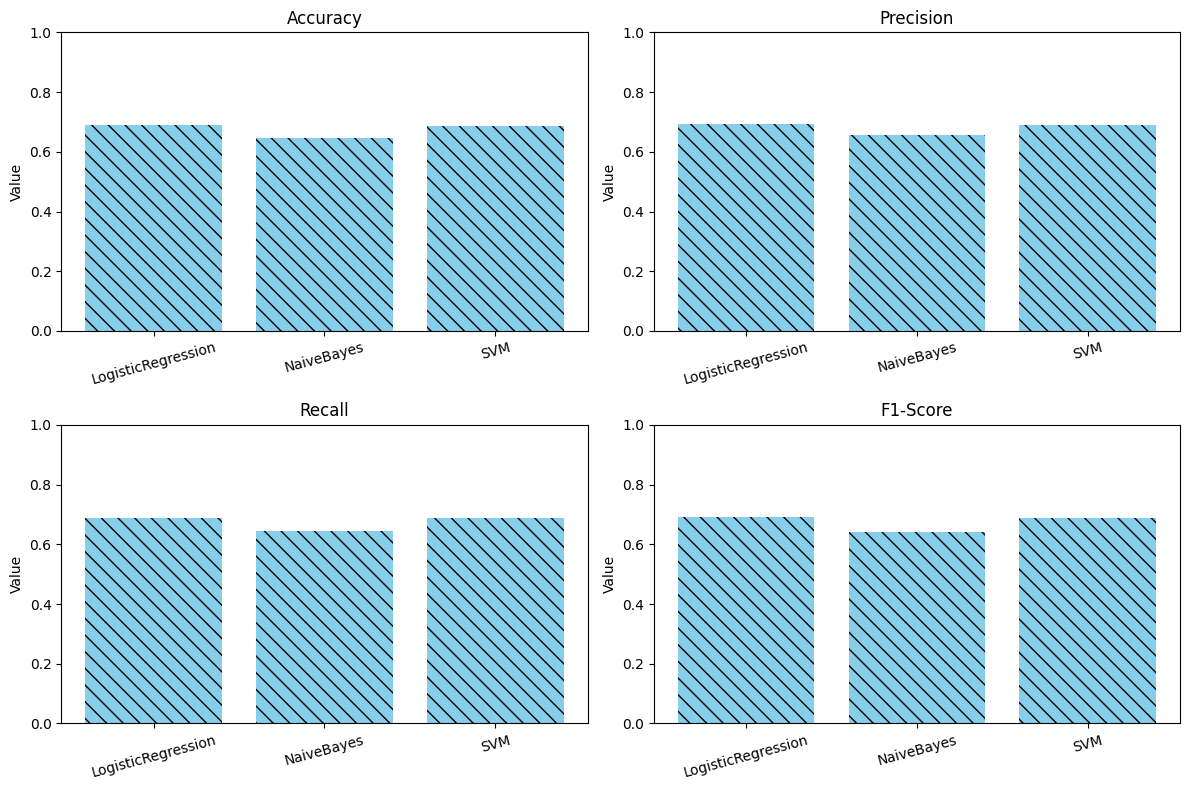

In [ ]:
plt.figure(figsize=(12, 8))
for i in range(len(vecs)):
  plt.subplot(2, 2, i + 1)
  plt.bar(vecs[i].keys(), vecs[i].values(), color = 'skyblue', hatch = '\\\\')
  plt.title(f"Model {metrics[i]} comparison")
  plt.title(metrics[i])
  plt.ylim(0, 1)
  plt.xticks(rotation = 15)
  plt.ylabel('Value')

plt.tight_layout()
plt.show()